The main focus of this notebook is to run some probabilistic analysis on a dataset. The notebook also includes visualizations and statistics to help understand the distribution and correlations of the data.

# Environment Set up

## Mount drive

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  !{sys.executable} -m pip install -U ydata-profiling[notebook]
  !pip install jupyter-contrib-nbextensions
  !jupyter nbextension enable --py widgetsnbextension
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import plotly
np.random.seed(0)
from rich import print
from rich.columns import Columns
from rich.panel import Panel
from rich.align import Align
from source.utils.print_util import *
from source.utils.data_preprocessing import *
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

# Data loading and Config

## Configuration

In [3]:
dataset_path = path_to_project + '/data/raw/diabetes-US.csv' if IN_COLAB else 'data/raw/diabetes-US.csv'
Y = 'readmitted'

## Load Data

In [4]:
# Define format of missing values
missing_values_format = ['?', 'Unknown/Invalid']

df = pd.read_csv(dataset_path, na_values=missing_values_format)
df.info()

<ipython-input-4-6c8b77419dfa>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, na_values=missing_values_format)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Report

In [5]:
import os
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
os.makedirs(path_to_project, exist_ok=True)

profile = ProfileReport(df, title='Diabetes Analysis Raw')
html_file = profile.to_file(path_to_project + '/data/reports/diabetes_analysis_raw.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing

## Missing Values

In [6]:
# Remove columns with a high percentage of null values and identifiers
df.drop(columns=['max_glu_serum', 'A1Cresult', 'encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'weight'], inplace=True)

# Remove columns with a diagnosis identifiers
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

# Remove columns more ids
df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)

# Drop unknown/missing values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99492 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99492 non-null  object
 1   gender                    99492 non-null  object
 2   age                       99492 non-null  object
 3   time_in_hospital          99492 non-null  int64 
 4   num_lab_procedures        99492 non-null  int64 
 5   num_procedures            99492 non-null  int64 
 6   num_medications           99492 non-null  int64 
 7   number_outpatient         99492 non-null  int64 
 8   number_emergency          99492 non-null  int64 
 9   number_inpatient          99492 non-null  int64 
 10  number_diagnoses          99492 non-null  int64 
 11  metformin                 99492 non-null  object
 12  repaglinide               99492 non-null  object
 13  nateglinide               99492 non-null  object
 14  chlorpropamide            

## Outlier Detection

In [7]:
# First 2 integer attributes
fig = plotly.boxplot_frame(df, y=['num_medications', 'num_lab_procedures'])
fig.show()

# Remaining integer attributes
fig = plotly.boxplot_frame(df, y=['time_in_hospital', 'number_outpatient', 'number_inpatient', 'number_diagnoses', 'number_emergency'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Use the function in utils to remove outliers
attributes = ['number_emergency', 'num_medications', 'num_lab_procedures', 'number_outpatient']
df = search_and_remove_outliers(df, attributes)

╭─ Searching outliers for the following attributes: ['number_emergency', 'num_medications', 'num_lab_procedures',─╮
│                         ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓                         │
│                         ┃     Attribute      ┃ # Outliers ┃ MAX Outlier ┃ MIN Outlier ┃                         │
│                         ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩                         │
│                         │  number_emergency  │   11303    │     76      │      1      │                         │
│                         │  num_medications   │    2294    │     81      │     36      │                         │
│                         │ num_lab_procedures │    198     │     121     │     94      │                         │
│                         │ number_outpatient  │   12247    │     42      │      1      │                         │
│                         └────────────────────┴────────────┴─────────────┴─────────────┘                         │
╰─────────────────────────────────────────────── OUTLIERS REMOVED ────────────────────────────────────────────────╯

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73450 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      73450 non-null  object
 1   gender                    73450 non-null  object
 2   age                       73450 non-null  object
 3   time_in_hospital          73450 non-null  int64 
 4   num_lab_procedures        73450 non-null  int64 
 5   num_procedures            73450 non-null  int64 
 6   num_medications           73450 non-null  int64 
 7   number_outpatient         73450 non-null  int64 
 8   number_emergency          73450 non-null  int64 
 9   number_inpatient          73450 non-null  int64 
 10  number_diagnoses          73450 non-null  int64 
 11  metformin                 73450 non-null  object
 12  repaglinide               73450 non-null  object
 13  nateglinide               73450 non-null  object
 14  chlorpropamide            

# Probabilistic Analysis

In [10]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [11]:
# Probability of having diabetes
print('Number of diabetic tuples:', df[df['readmitted'] == 'NO'].shape[0] )
print('Probability of having diabetes:', np.mean(df['readmitted'] == 'NO'), '\n')

# Probability of not having diabetes
print('Number of non-diabetic tuples:', df[df['readmitted'] != 'NO'].shape[0] )
print('Probability of not having diabetes:', np.mean(df['readmitted'] != 'NO'))

Number of diabetic tuples: 42172

Probability of having diabetes: 0.5741592920353983

Number of non-diabetic tuples: 31278

Probability of not having diabetes: 0.4258407079646018

In [12]:
# Probabilities given white

# Data with only caucasian people
caucasian_data = df[df['race'] == 'Caucasian']

print('Probability of being white:', np.mean(df['race'] == 'Caucasian'))

# Calculate probability of having diabetes given white
prob_diabetes_given_white = np.mean(caucasian_data['readmitted'] != 'NO')
print('Probability of having diabetes given white:', prob_diabetes_given_white)

# Calculate probability of not having diabetes given white
prob_not_diabetes_given_white = np.mean(caucasian_data['readmitted'] == 'NO')
print('Probability of not having diabetes given white:', prob_not_diabetes_given_white)

Probability of being white: 0.7567733151803948

Probability of having diabetes given white: 0.4309435998920572

Probability of not having diabetes given white: 0.5690564001079428

In [13]:
# Probabilities given non-white

# Data with only non-caucasian people
non_caucasian_data = df[df['race'] != 'Caucasian']

print('Probability of being non-white: ', np.mean(df['race'] != 'Caucasian'))

# Calculate probability of having diabetes given non-white
prob_diabetes_given_non_white = np.mean(non_caucasian_data['readmitted'] != 'NO')
print('Probability of having diabetes given non-white: ', prob_diabetes_given_non_white)

# Calculate probability of not having diabetes given non-white
prob_not_diabetes_given_non_white = np.mean(non_caucasian_data['readmitted'] == 'NO')
print('Probability of not having diabetes given non-white: ', prob_not_diabetes_given_non_white)

Probability of being non-white:  0.24322668481960516

Probability of having diabetes given non-white:  0.40996361600895603

Probability of not having diabetes given non-white:  0.590036383991044

# Transformation

In [14]:
# Race mapping
race_mapping = {'Caucasian': 1, 'AfricanAmerican': 0, 'Other': 0, 'Asian': 0, 'Hispanic': 0}
df['race_category'] = df['race'].map(race_mapping)

# Gender mapping
gender_mapping = {'Female': 0, 'Male': 1}
df['gender_category'] = df['gender'].map(gender_mapping)

# There's a lot of attributes that follow this mapping
general_mapping = {'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}

df['metformin_category'] = df['metformin'].map(general_mapping)
df['repaglinide_category'] = df['repaglinide'].map(general_mapping)
df['nateglinide_category'] = df['nateglinide'].map(general_mapping)
df['chlorpropamide_category'] = df['chlorpropamide'].map(general_mapping)
df['glimepiride_category'] = df['glimepiride'].map(general_mapping)
df['acetohexamide_category'] = df['acetohexamide'].map(general_mapping)
df['glipizide_category'] = df['glipizide'].map(general_mapping)
df['glyburide_category'] = df['glyburide'].map(general_mapping)
df['tolbutamide_category'] = df['tolbutamide'].map(general_mapping)
df['pioglitazone_category'] = df['pioglitazone'].map(general_mapping)
df['rosiglitazone_category'] = df['rosiglitazone'].map(general_mapping)
df['acarbose_category'] = df['acarbose'].map(general_mapping)
df['miglitol_category'] = df['miglitol'].map(general_mapping)
df['troglitazone_category'] = df['troglitazone'].map(general_mapping)
df['tolazamide_category'] = df['tolazamide'].map(general_mapping)
df['examide_category'] = df['examide'].map(general_mapping)
df['citoglipton_category'] = df['citoglipton'].map(general_mapping)
df['insulin_category'] = df['insulin'].map(general_mapping)
df['glyburide-metformin_category'] = df['glyburide-metformin'].map(general_mapping)
df['glipizide-metformin_category'] = df['glipizide-metformin'].map(general_mapping)
df['glimepiride-pioglitazone_category'] = df['glimepiride-pioglitazone'].map(general_mapping)
df['metformin-rosiglitazone_category'] = df['metformin-rosiglitazone'].map(general_mapping)
df['metformin-pioglitazone_category'] = df['metformin-pioglitazone'].map(general_mapping)

In [15]:
df['age_mean'] = df['age'].apply(lambda x: int(x.split('-')[0][1:]) + 5)

# Chosen age category to be > 25
df["age_category"] = df['age_mean'].apply(lambda age: 1 if age > 25 else 0)

df['change_category'] = df['change'].map(lambda x: 0 if x == 'No' else 1)
df['diabetes-medication_category'] = df['diabetesMed'].map(lambda x: 0 if x == 'No' else 1)
df['diabetes'] = df['readmitted'].map(lambda x: 0 if x == 'NO' else 1)

In [16]:
df = df.drop(columns=['race', 'gender', 'age', 'metformin', 'repaglinide',
                      'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                      'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                      'rosiglitazone', 'acarbose', 'miglitol' , 'troglitazone',
                      'tolazamide', 'examide', 'citoglipton', 'insulin',
                      'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
                      'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',  'readmitted'])

df.head(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_category,gender_category,...,glyburide-metformin_category,glipizide-metformin_category,glimepiride-pioglitazone_category,metformin-rosiglitazone_category,metformin-pioglitazone_category,age_mean,age_category,change_category,diabetes-medication_category,diabetes
0,1,41,0,1,0,0,0,1,1,0,...,0,0,0,0,0,5,0,0,0,0
1,3,59,0,18,0,0,0,9,1,0,...,0,0,0,0,0,15,0,1,1,1
3,2,44,1,16,0,0,0,7,1,1,...,0,0,0,0,0,35,1,1,1,0
4,1,51,0,8,0,0,0,5,1,1,...,0,0,0,0,0,45,1,1,1,0
5,3,31,6,16,0,0,0,9,1,1,...,0,0,0,0,0,55,1,0,1,1


# Visualization

<Axes: >

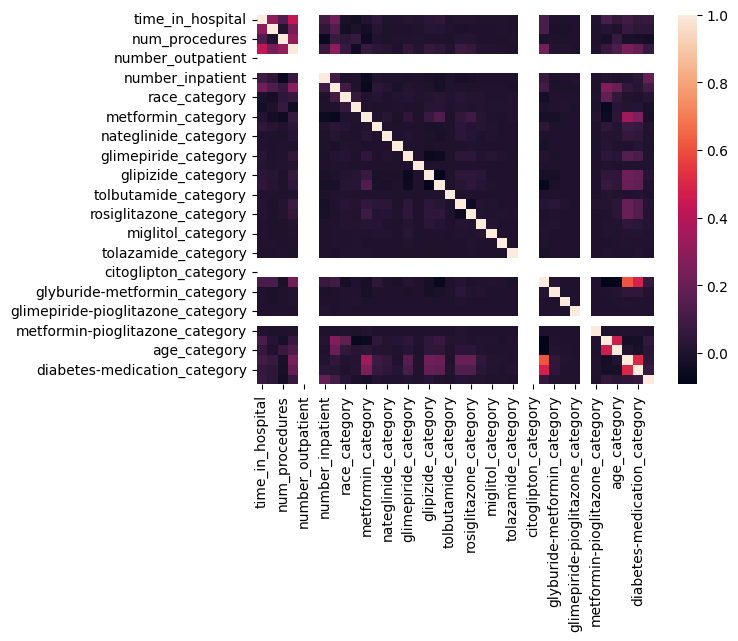

In [17]:
sns.heatmap(df.corr())

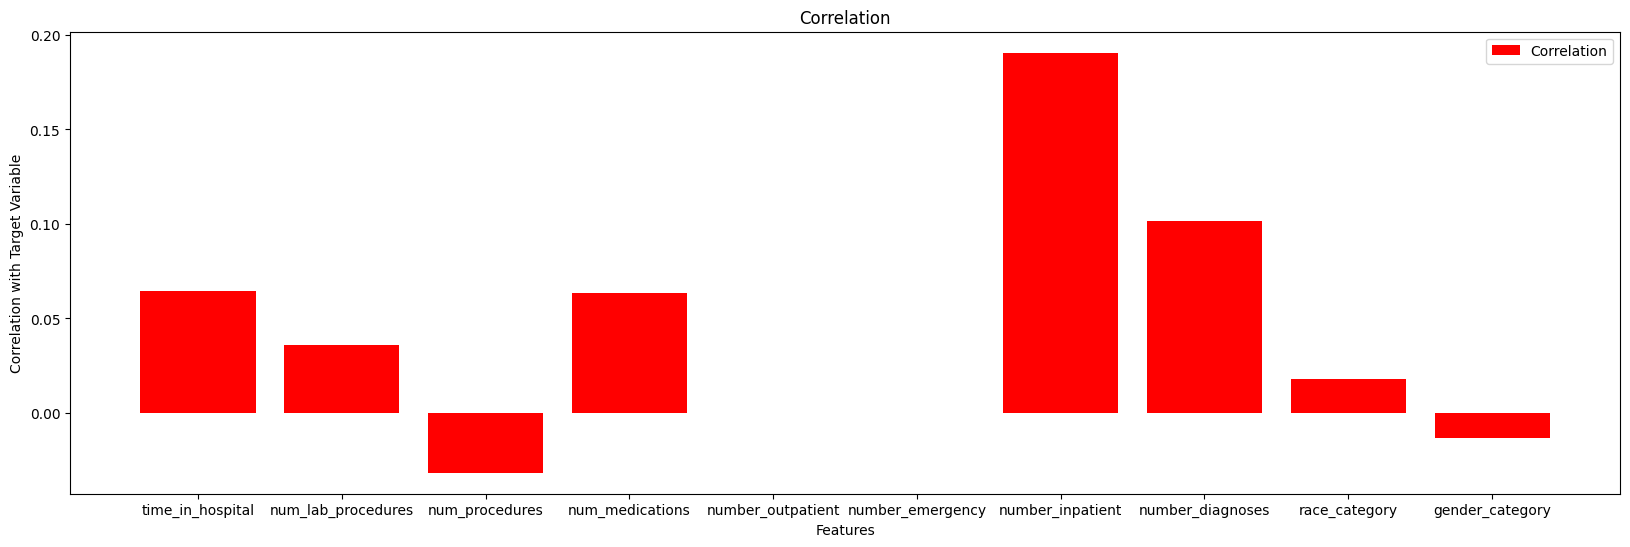

In [18]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns.to_list()[:10], df.corr()['diabetes'][:-1].to_list()[:10], color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

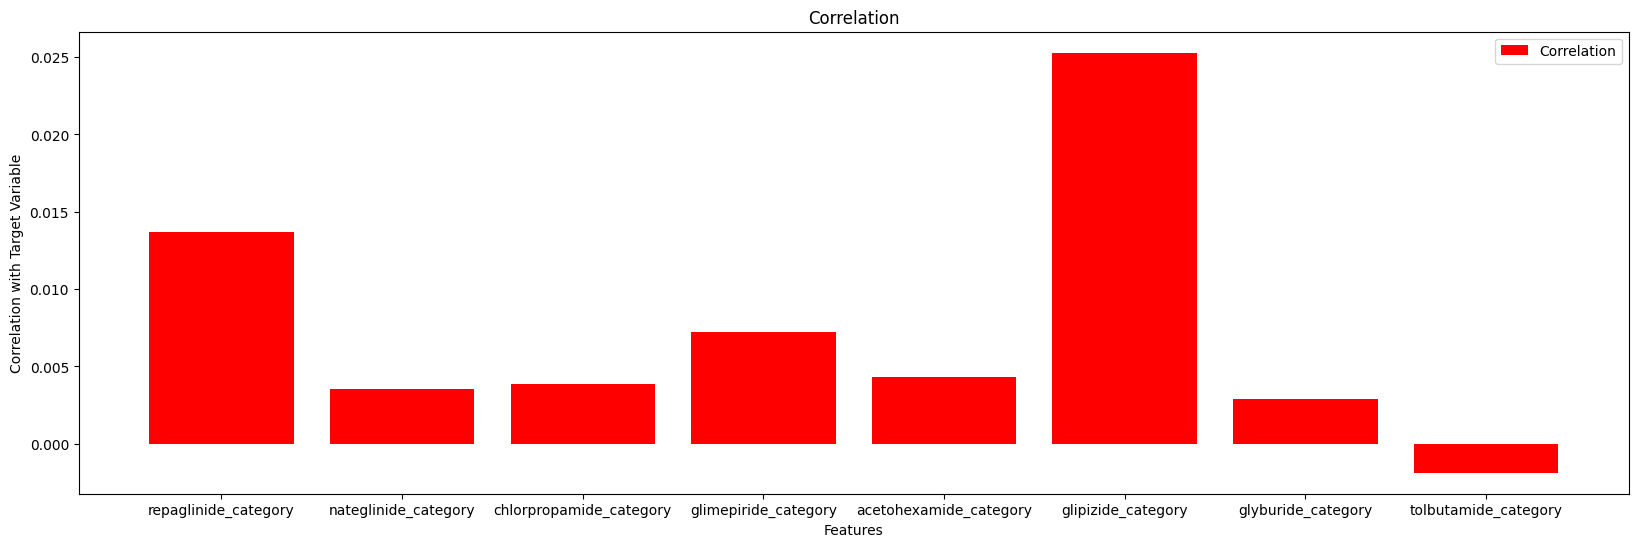

In [19]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns.to_list()[11:19], df.corr()['diabetes'][:-1].to_list()[11:19], color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

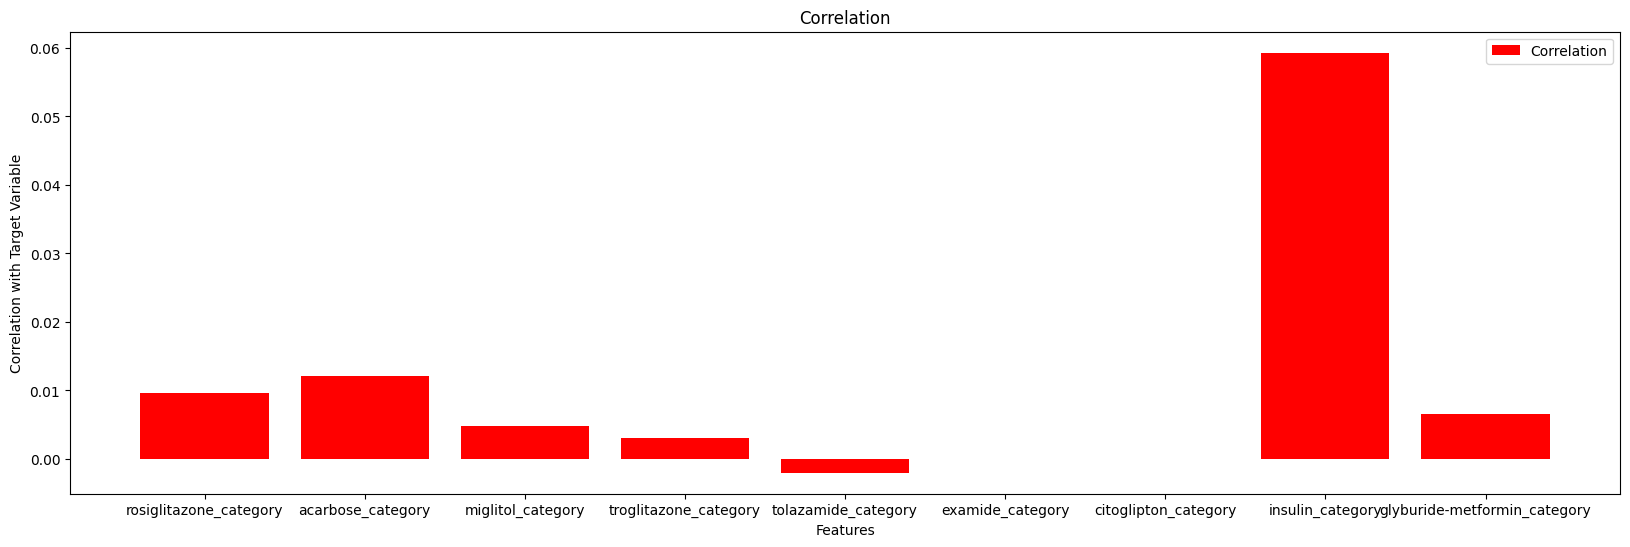

In [20]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns.to_list()[20:29], df.corr()['diabetes'][:-1].to_list()[20:29], color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

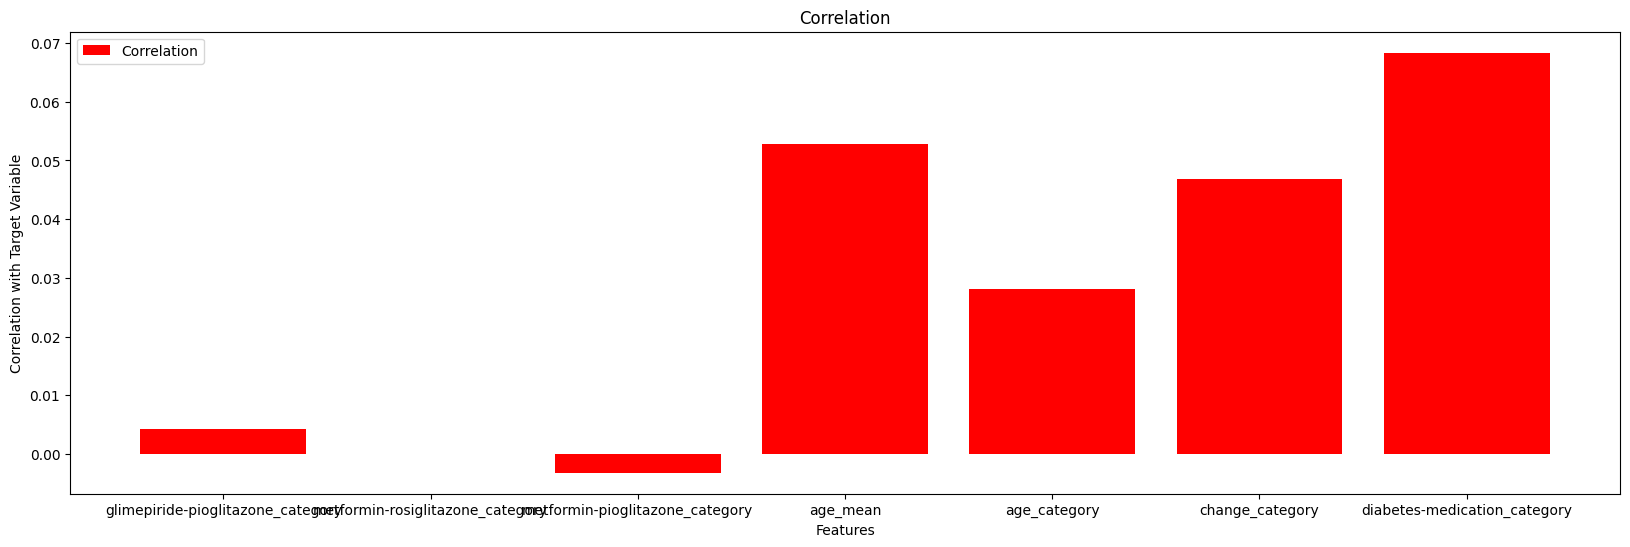

In [21]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns[:-1].to_list()[30:], df.corr()['diabetes'][:-1].to_list()[30:], color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

# Dimensionality Reduction

In [22]:
# Drop columns that have less than 0.05 correlation with target
features_corr = [(column, correlation) for column, correlation in zip(df.columns, df.corr()['diabetes'])]

# Column list if correlation > 0.05
features = [item[0] for item in features_corr if item[1] > 0.04 or item[1] < -0.01]

# Add features from feature importance analysis (previosuly run) and sensitive attribute
features = features + ['num_lab_procedures', 'glyburide_category', 'glipizide_category', 'race_category']

# I have decided not to perform dimensionality reduction
df[features]

,time_in_hospital,num_procedures,num_medications,number_inpatient,number_diagnoses,gender_category,metformin_category,insulin_category,age_mean,change_category,diabetes-medication_category,diabetes,num_lab_procedures,glyburide_category,glipizide_category,race_category
0,1,0,1,0,1,0,0,0,5,0,0,0,41,0,0,1
1,3,0,18,0,9,0,0,3,15,1,1,1,59,0,0,1
3,2,1,16,0,7,1,0,3,35,1,1,0,44,0,0,1
4,1,0,8,0,5,1,0,1,45,1,1,0,51,0,1,1
5,3,6,16,0,9,1,0,1,55,0,1,1,31,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,5,1,16,1,9,0,0,1,75,0,1,0,21,0,0,1
101761,3,0,16,0,9,1,1,2,75,1,1,1,51,0,0,0
101762,5,3,18,1,9,0,0,1,85,0,1,0,33,0,0,0
101764,10,2,21,1,9,0,0,3,85,1,1,0,45,0,1,1


In [23]:
# Shuffle data frame to avoid errors when training i.e. due to unbalanced datasets
df = df.sample(frac=1)
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_category,gender_category,...,glyburide-metformin_category,glipizide-metformin_category,glimepiride-pioglitazone_category,metformin-rosiglitazone_category,metformin-pioglitazone_category,age_mean,age_category,change_category,diabetes-medication_category,diabetes
76802,2,49,0,19,0,0,1,9,1,0,...,0,0,0,0,0,55,1,1,1,0
14058,2,19,0,15,0,0,2,8,1,0,...,0,0,0,0,0,85,1,0,0,1
57652,1,52,1,12,0,0,0,9,0,0,...,0,0,0,0,0,65,1,0,1,0
79536,7,47,1,14,0,0,1,6,1,1,...,0,0,0,0,0,65,1,0,1,1
77849,7,41,2,32,0,0,0,9,1,0,...,0,0,0,0,0,85,1,1,1,0


## Report post preprocessing

In [24]:
import os
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
os.makedirs(path_to_project, exist_ok=True)

profile = ProfileReport(df, title='Diabetes Analysis')
html_file = profile.to_file(path_to_project + '/data/reports/diabetes_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Save Dataset

In [26]:
saving_path = path_to_project + '/data/preprocessed/preprocessed-diabetes-prediction.csv' if IN_COLAB else 'data/preprocessed/preprocessed-diabetes-prediction.csv'
df.to_csv(saving_path, sep=',', index=False, encoding='utf-8')